In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Average (Mean) ##

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [67]:
# Discussion Q
1*(1/9) + 2*(2/9) + 3*(3/9) + 4*(2/9)+ 5*(1/9)

3.0

In [9]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


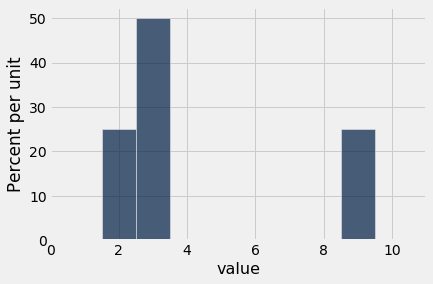

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [11]:
np.mean(values)

4.25

In [12]:
## Make array of 10 2s, 20 3s, and 10 9s
twos = 2*np.ones(10)
threes = 3*np.ones(20)
nines = 9*np.ones(10)
new_vals = np.append(np.append(twos, threes), nines)
new_vals

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9.])

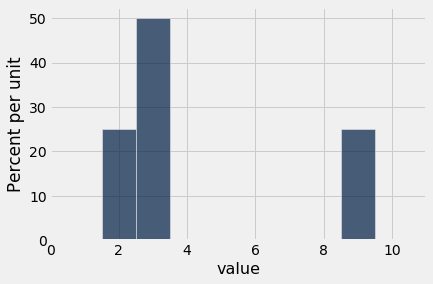

In [13]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [14]:
np.average(values)

4.25

In [15]:
np.average(new_vals)

4.25

In [16]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


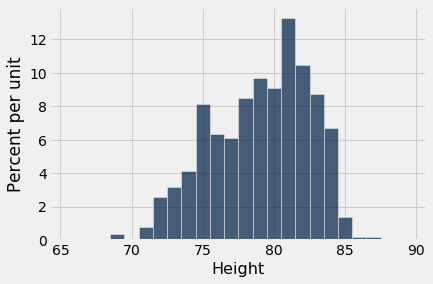

In [17]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [18]:
heights = nba.column('Height')
percentile(50, heights)

80

In [19]:
np.average(heights)

79.06534653465347

## Standard Deviation ##

In [20]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [21]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [22]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [23]:
sum(deviations)

0.0

In [24]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [25]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [26]:
# Standard Deviation (SD) is the square root of the variance
sd = variance ** 0.5
sd

2.7726341266023544

In [27]:
np.std(values)

2.7726341266023544

## Chebyshev's Bounds ##

In [28]:
births = Table.read_table('baby.csv')

In [29]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

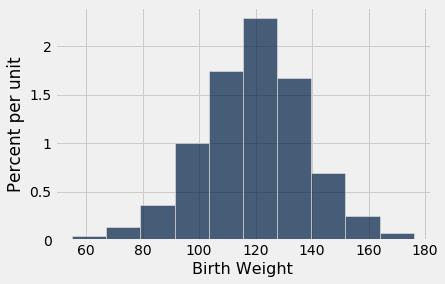

In [30]:
births.hist('Birth Weight')

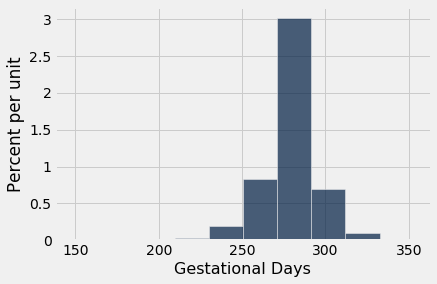

In [31]:
births.hist('Gestational Days')

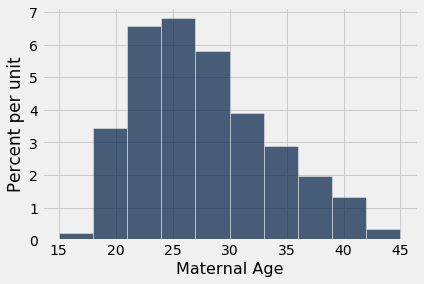

In [32]:
births.hist('Maternal Age')

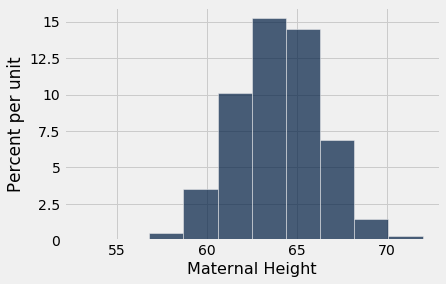

In [33]:
births.hist('Maternal Height')

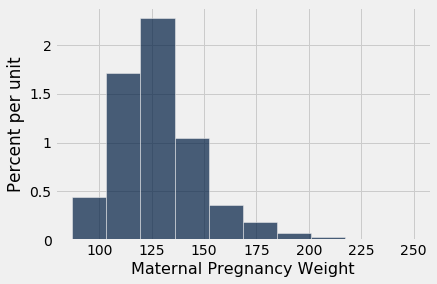

In [34]:
births.hist('Maternal Pregnancy Weight')

In [35]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
print("mean:", mean)
print("sd:", sd)

mean: 128.4787052810903
sd: 20.72544970428041


In [36]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [37]:
within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [38]:
# Chebyshev's bound: 
# This proportion should be at least
1 - 1/3**2

0.8888888888888888

In [39]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %

Maternal Smoker
Average plus or minus 2 SDs: 100.0 %
Average plus or minus 3 SDs: 100.0 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %


## Standard Units ##

In [40]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [41]:
ages = births.column('Maternal Age')

In [42]:
ages

array([27, 33, 28, ..., 30, 21, 38])

In [43]:
ages_standard_units = standard_units(ages)

In [44]:
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [45]:
print("Standard unit mean", np.mean(ages_standard_units))
print("Standard unit SD", np.std(ages_standard_units))

Standard unit mean -7.868020072300939e-17
Standard unit SD 1.0


In [46]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [47]:
print("Ages mean", np.mean(ages))
print("Ages SD", np.std(ages))

Ages mean 27.228279386712096
Ages SD 5.815360404190897


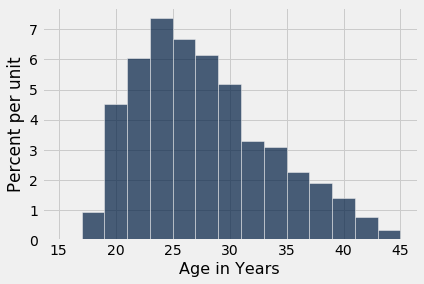

In [48]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

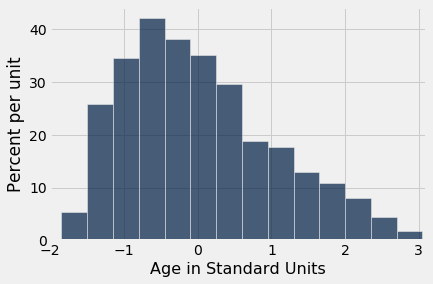

In [49]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

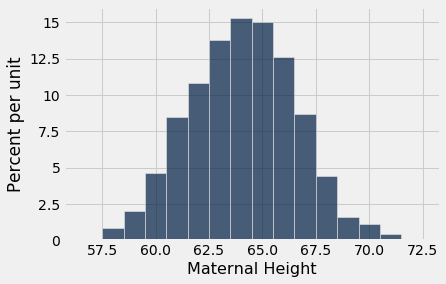

In [50]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [51]:
heights = births.column('Maternal Height')
print("Mean height:", np.mean(heights))
print("Height SD:", np.std(heights))

Mean height: 64.04940374787053
Height SD: 2.5250254409674375


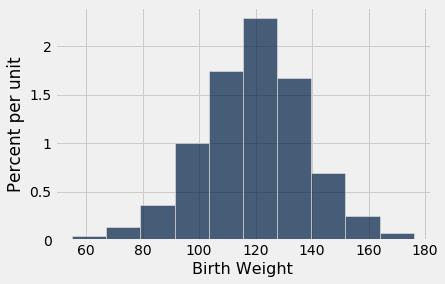

In [52]:
births.hist('Birth Weight')

In [53]:
bw = births.column('Birth Weight')
mean_w = np.mean(bw)
sd_w = np.std(bw)
print("Mean Weight:", mean_w)
print("Weight SD:", sd_w)

Mean Weight: 119.46252129471891
Weight SD: 18.32086370220278


## The normal curve ##

In [54]:
red_winnings = np.append(1*np.ones(18), -1*np.ones(20))
red = Table().with_columns('Winnings on Red', red_winnings)

In [55]:
red

Winnings on Red
1
1
1
1
1
1
1
1
1
1


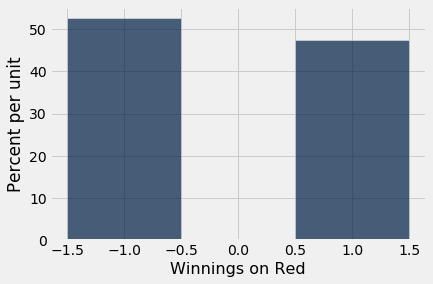

In [56]:
red.hist(bins = np.arange(-1.5, 1.6, 1))

In [57]:
num_bets = 100 
net_gains = make_array()

for i in np.arange(20000):
    spins = red.sample(num_bets)
    # net gain after 100 bets
    new_net_gain = sum(spins.column('Winnings on Red'))
    net_gains = np.append(net_gains, new_net_gain)
 

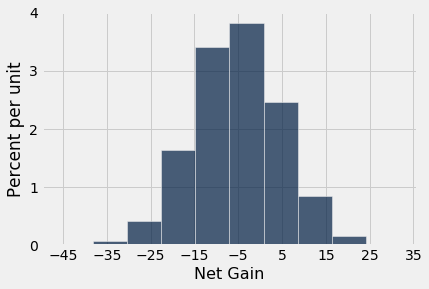

In [58]:
Table().with_columns('Net Gain', net_gains).hist()
plots.xticks(np.arange(-45, 36, 10));

## Central Limit Theorem and Simulating Sample Mean ##

In [59]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


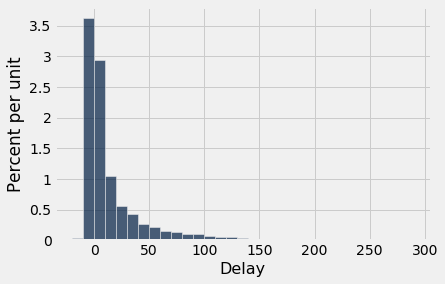

In [60]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [61]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

print("Average Delay:", mean_delay)
print("Delay SD:", sd_delay)

Average Delay: 16.658155515370705
Delay SD: 39.480199851609314


In [62]:
united = united.with_columns(
    'Delay in Standard Units', standard_units(delays)
)
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay in Standard Units
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


In [63]:
chosen = united.where('Delay in Standard Units', are.between(-3, 3))
chosen.num_rows/united.num_rows

0.9790235081374322

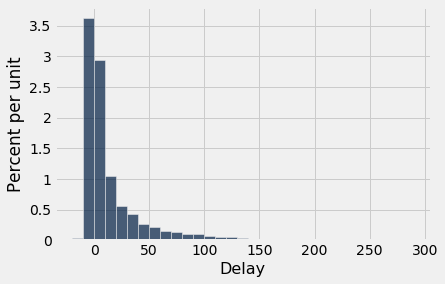

In [64]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [65]:
sample_size = 400

means = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)

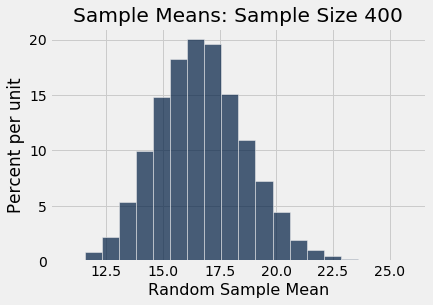

In [66]:
Table().with_columns('Sample Mean', means).hist(bins = 20)
plots.title('Sample Means: Sample Size ' + str(sample_size))
plots.xlabel('Random Sample Mean');